# Polynomial Regression
- feature가 여러개인 Multiple Regression과 다르게 x는 하나인 대신에 해당 x의 제곱차승이 더해진 모델
- X가 제곱, 세제곱 등의 다차원으로 가지만 그래도 Polynomial Linear Regression이다.
- Regression의 Linear함의 기준은 x가 아니라 coefficient가 되기 때문
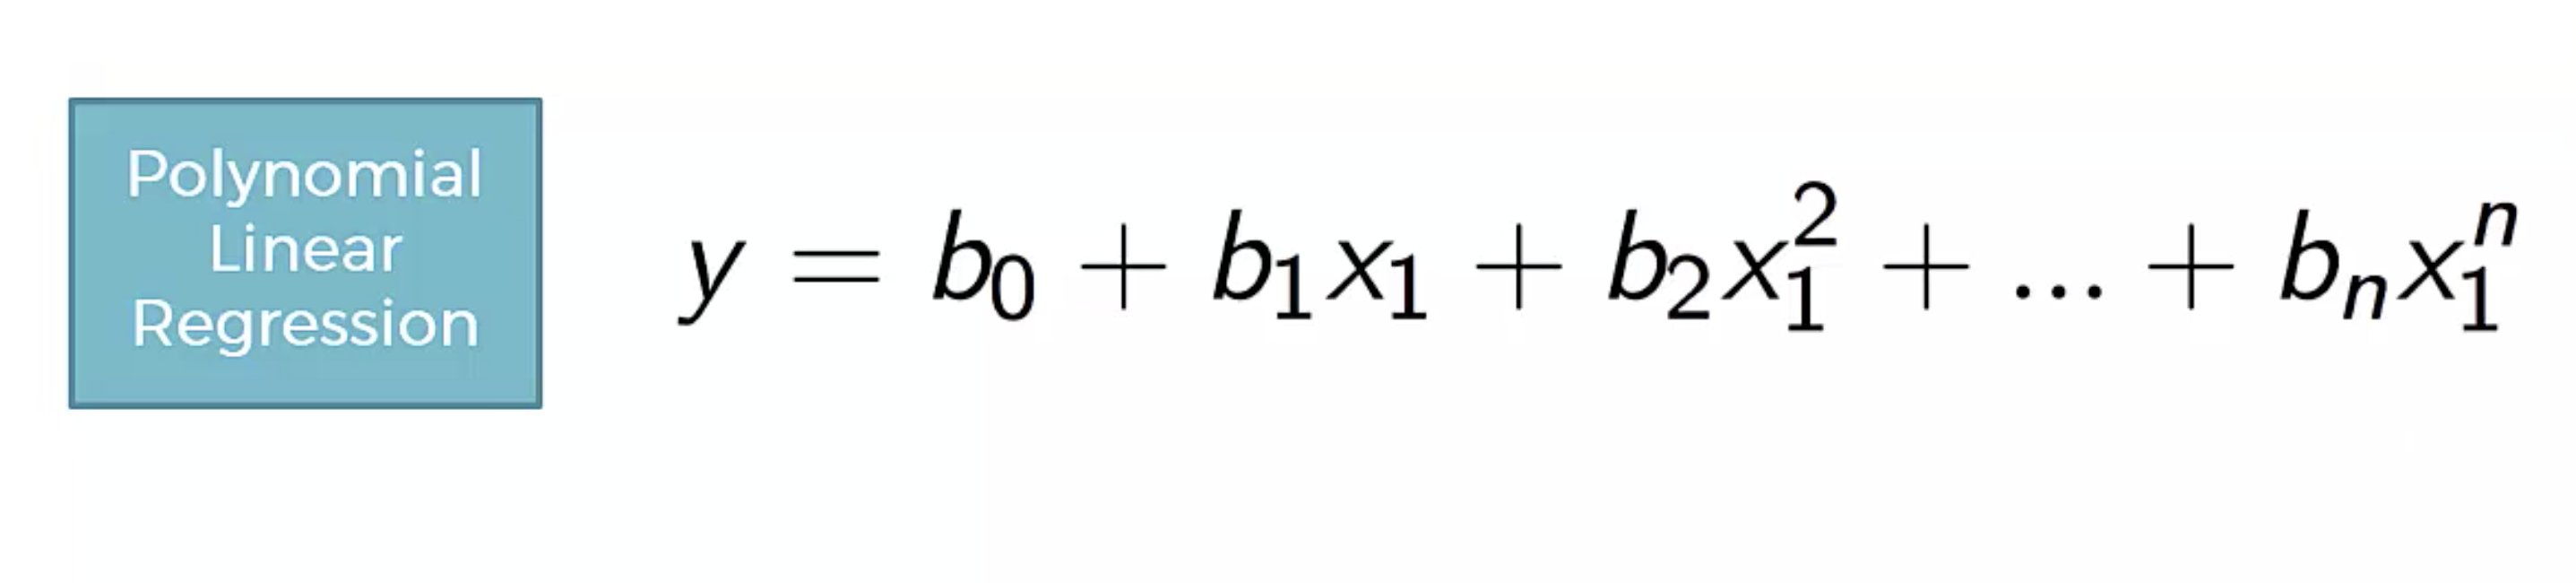

In [ ]:
#Paste the Data-Preprocessing script below
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Position_Salaries.csv")
dataset

In [ ]:
plt.scatter(dataset.Level,dataset.Salary)

In [ ]:
X = dataset.iloc[:,1].values
y = dataset.iloc[:,2].values

In [ ]:
X

In [ ]:
#We want our feature matrix to be always matrix
X = dataset.iloc[:,1:2].values
X

### 이번에 Train_test로 데이터셋을 나누지 않는다. 왜냐면 10개의 Observation밖에 없기때문
- 이제 Linear Regression모델을 우리의 데이터셋에 fit해보도록 합시다

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

- 이번에는 Polynomial Regression모델을 적용시켜봅시다.
- Degree는 얼마가 적당할까요?
- Feature Scaling이 필요할까요?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X) #this Transforms our X Matrix into polynomial feature matrix

In [ ]:
X_poly

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
poly_reg.fit(X_poly,y)

- Let's visualize our models built so far

In [ ]:
#Simple Linear Regression Model
plt.scatter(X,y, color = 'red')
plt.plot(X,lin_reg.predict(X), color = 'blue')

In [ ]:
#Polynomial Regression Model
plt.scatter(X,y, color = 'red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')

In [ ]:
#to make better fit, degree를 증가시켜보자 
poly_reg_2 = PolynomialFeatures(degree = 3)
X_poly = poly_reg_2.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg_2.fit_transform(X)))

In [ ]:
#Degree 4면?
poly_reg_2 = PolynomialFeatures(degree = 4)
X_poly = poly_reg_2.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg_2.fit_transform(X)))

In [ ]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((-1,1))
X_grid

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_2.predict(poly_reg_2.fit_transform(X_grid)))

## 모델을 만들었으니 새로운 X에대한 y를 예측해볼까요?

In [ ]:
lin_reg.predict([[6.5]]) #Linear model Prediction

In [ ]:
lin_reg_2.predict(poly_reg_2.fit_transform([[6.5]]))